In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import model_selection
from sklearn import tree
from sklearn import linear_model

# Microsoft Corporation

Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. Its Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for organizations and enterprise divisions. Its Intelligent Cloud segment licenses SQL, Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also offers support services and Microsoft consulting services to assist customers in developing, deploying, and managing Microsoft server and desktop solutions; and training and certification on Microsoft products. Its More Personal Computing segment provides Windows original equipment manufacturer (OEM) licensing and other non-volume licensing of the Windows operating system; Windows Commercial, such as volume licensing of the Windows operating system, Windows cloud services, and other Windows commercial offerings; patent licensing; Windows Internet of Things; and MSN advertising. It also offers Surface, PC accessories, PCs, tablets, gaming and entertainment consoles, and other devices; Gaming, including Xbox hardware, and Xbox content and services; video games and third-party video game royalties; and Search, including Bing and Microsoft advertising. It sells its products through OEMs, distributors, and resellers; and directly through digital marketplaces, online stores, and retail stores. It has collaborations with Dynatrace, Inc., Morgan Stanley, Micro Focus, WPP plc, ACI Worldwide, Inc., and iCIMS, Inc., as well as a strategic relationship with Avaya Holdings Corp. Microsoft Corporation was founded in 1975 and is headquartered in Redmond, Washington.

In [27]:
msft = pd.read_csv('C:/Users/steve/Documents/bootcamp/nu-chi-data-pt-04-2021-u-c/01-Curriculum/msft_stock.csv')
msft

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,62.790001,62.840000,62.130001,62.580002,58.291969,20694100
1,2017-01-04,62.480000,62.750000,62.119999,62.299999,58.031147,21340000
2,2017-01-05,62.189999,62.660000,62.029999,62.299999,58.031147,24876000
3,2017-01-06,62.299999,63.150002,62.040001,62.840000,58.534157,19922900
4,2017-01-09,62.759998,63.080002,62.540001,62.639999,58.347855,20382700
...,...,...,...,...,...,...,...
1162,2021-08-16,293.190002,294.820007,290.019989,294.600006,294.037109,22507600
1163,2021-08-17,292.390015,293.429993,291.079987,293.079987,292.519989,20075300
1164,2021-08-18,292.040009,294.820007,290.269989,290.730011,290.730011,21813000
1165,2021-08-19,288.690002,297.470001,288.640015,296.769989,296.769989,29850500


In [3]:
msft = msft[['Date', 'Close']]

In [4]:
new_msft = msft.loc[884:1167]

In [9]:
msft.shape

(1167, 2)

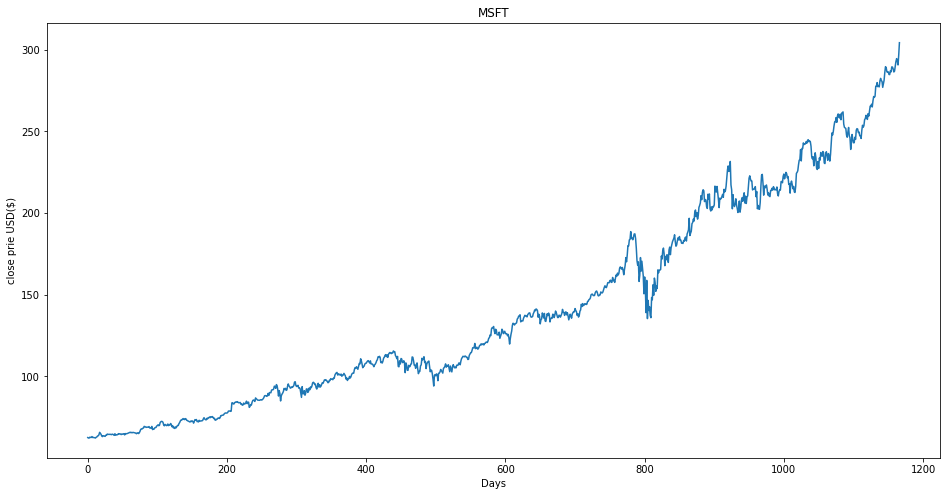

In [17]:
plt.figure(figsize =(16,8))
plt.title('MSFT')
plt.xlabel('Days')
plt.ylabel('close prie USD($)')
plt.plot(msft['Close'])
plt.show()

In [18]:
close_price = msft[['Close']]

In [19]:
close_price

,Close
0,62.580002
1,62.299999
2,62.299999
3,62.840000
4,62.639999
...,...
1162,294.600006
1163,293.079987
1164,290.730011
1165,296.769989


In [20]:
future_days = 30

close_price['prediction'] = close_price[['Close']].shift(-future_days)

In [21]:
close_price

,Close,prediction
0,62.580002,64.529999
1,62.299999,64.519997
2,62.299999,64.620003
3,62.840000,64.489998
4,62.639999,64.360001
...,...,...
1162,294.600006,NaN
1163,293.079987,NaN
1164,290.730011,NaN
1165,296.769989,NaN


In [29]:
X= np.array(close_price.drop(['prediction'],1))[:-future_days]

C:\Users\steve\AppData\Local\Temp/ipykernel_23680/1274731598.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X= np.array(close_price.drop(['prediction'],1))[:-future_days]


In [30]:
print(x)

[[ 62.58000183]
 [ 62.29999924]
 [ 62.29999924]
 ...
 [279.92999268]
 [277.42001343]
 [277.94000244]]


In [31]:
y= np.array(close_price['prediction'])[:-future_days]

In [32]:
print(y)

[ 64.52999878  64.51999664  64.62000275 ... 290.73001099 296.76998901
 304.35998535]


In [39]:
#split the data into 75% training and 25% testing 
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=25)

In [48]:
#create the models
#create the decision tree regressor model
tree = sklearn.tree.DecisionTreeRegressor().fit(x_train, y_train)

In [49]:
#linear regression model
lr = sklearn.linear_model.LinearRegression().fit(x_train, y_train)

In [52]:
x_future = close_price.drop(['prediction'], 1)[:-future_days]

C:\Users\steve\AppData\Local\Temp/ipykernel_23680/4106418182.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_future = close_price.drop(['prediction'], 1)[:-future_days]


In [53]:
x_future = x_future.tail(future_days)

In [54]:
x_future = np.array(x_future)
x_future

array([[249.30999756],
       [249.67999268],
       [247.3999939 ],
       [247.30000305],
       [245.71000671],
       [250.78999329],
       [253.80999756],
       [252.57000732],
       [253.58999634],
       [257.23999023],
       [257.89001465],
       [259.89001465],
       [258.35998535],
       [257.38000488],
       [260.8999939 ],
       [259.42999268],
       [262.63000488],
       [265.51000977],
       [265.26998901],
       [266.69000244],
       [265.01998901],
       [268.72000122],
       [271.3999939 ],
       [270.8999939 ],
       [271.6000061 ],
       [277.6499939 ],
       [277.66000366],
       [279.92999268],
       [277.42001343],
       [277.94000244]])

In [55]:
#show the model tree prediction
tree_prediction = tree.predict(x_future)

In [57]:
print(tree_prediction)

[277.32000732 280.98001099 282.51000977 281.02999878 280.75
 277.01000977 279.32000732 281.3999939  286.14001465 250.78999329
 289.04998779 286.54000854 286.22000122 286.5        284.91000366
 284.82000732 287.11999512 289.51998901 289.51998901 289.45999146
 288.32998657 286.44000244 286.95001221 289.80999756 292.8500061
 294.6000061  293.07998657 290.73001099 296.76998901 304.35998535]


In [58]:
#show model linear regression predciton
lr_prediction = lr.predict(x_future)

In [59]:
lr_prediction 

array([260.11656318, 260.50267023, 258.12338582, 258.01904074,
       256.35980585, 261.66100732, 264.81252177, 263.51853448,
       264.5829403 , 268.39187813, 269.07020873, 271.15730144,
       269.56064495, 268.5379899 , 272.21126161, 270.67724719,
       274.01660827, 277.02202686, 276.77155408, 278.25340392,
       276.51066749, 280.37180174, 283.16849833, 282.64672515,
       283.37722034, 289.69066305, 289.7011087 , 292.06994746,
       289.45066777, 289.99330041])

In [61]:
#visualized the data
predictions = tree_prediction 
valid = close_price[X.shape[0]:]

C:\Users\steve\AppData\Local\Temp/ipykernel_23680/4170329595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['prediction'] = predictions


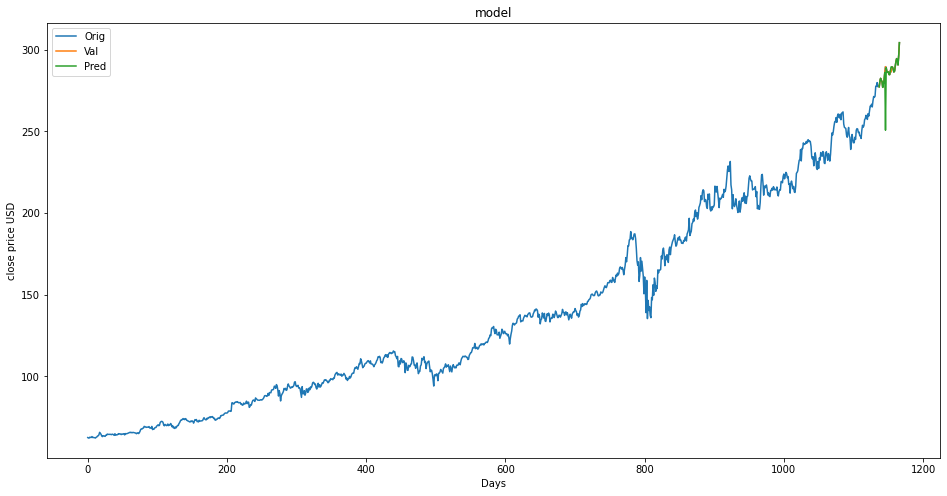

In [68]:
valid['prediction'] = predictions 
plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('Days')
plt.ylabel('close price USD')
plt.plot(close_price['Close'])
plt.plot(valid[['Close','prediction']])
plt.legend(['Orig','Val','Pred'])
plt.show()

C:\Users\steve\AppData\Local\Temp/ipykernel_23680/4052443177.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['prediction'] = predictions


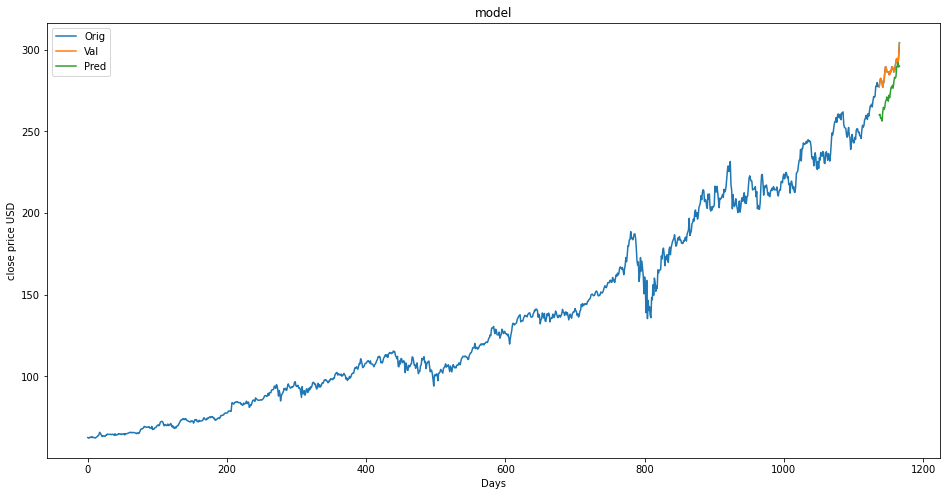

In [71]:
predictions = lr_prediction 
valid = close_price[X.shape[0]:]
valid['prediction'] = predictions 
plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('Days')
plt.ylabel('close price USD')
plt.plot(close_price['Close'])
plt.plot(valid[['Close','prediction']])
plt.legend(['Orig','Val','Pred'])
plt.show()

# Antero Resources 

'Antero Resources Corporation, an independent oil and natural gas company, acquires, explores for, develops, and produces natural gas, natural gas liquids, and oil properties in the United States. As of December 31, 2019, the company had approximately 451,000 net acres in the southwestern core of the Marcellus Shale; and 91,000 net acres in the core of the Utica Shale. It also owned and operated 324 miles of gas gathering pipelines in the Marcellus Shale; 17 compressor stations in the Marcellus Shale; 110 miles of low-pressure and high-pressure gathering pipelines in the Utica Shale; 8 miles of high-pressure pipelines; and 2 compressor stations in the Utica Shale. The company had estimated proved reserves of 18.9 trillion cubic feet of natural gas equivalent, including 11.5 trillion cubic feet of natural gas; 652 million barrels of assumed recovered ethane; 540 million barrels of primarily propane, isobutane, normal butane, and natural gasoline; and 42 million barrels of oil. The company was formerly known as Antero Resources Appalachian Corporation and changed its name to Antero Resources Corporation in June 2013. Antero Resources Corporation was founded in 2002 and is headquartered in Denver, Colorado.'

In [28]:
AR = pd.read_csv('C:/Users/steve/Documents/bootcamp/nu-chi-data-pt-04-2021-u-c/01-Curriculum/AR_stock.csv')
AR

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,23.889999,24.580000,23.070000,23.680000,23.680000,6148400
1,2017-01-04,23.709999,24.730000,23.650000,24.629999,24.629999,4054600
2,2017-01-05,24.629999,25.180000,24.280001,24.889999,24.889999,4756200
3,2017-01-06,25.049999,25.200001,24.520000,24.680000,24.680000,2689100
4,2017-01-09,24.410000,24.660000,24.090000,24.120001,24.120001,2450100
...,...,...,...,...,...,...,...
1162,2021-08-16,12.500000,12.810000,12.160000,12.570000,12.570000,5752500
1163,2021-08-17,12.470000,12.950000,12.360000,12.680000,12.680000,5576400
1164,2021-08-18,12.640000,12.850000,11.890000,11.990000,11.990000,7881600
1165,2021-08-19,11.710000,11.870000,10.910000,11.380000,11.380000,11457100


In [5]:
AR = AR[['Date', 'Close']]

In [6]:
new_AR = AR.loc[884:1167]

In [7]:
AR.shape

(1167, 2)

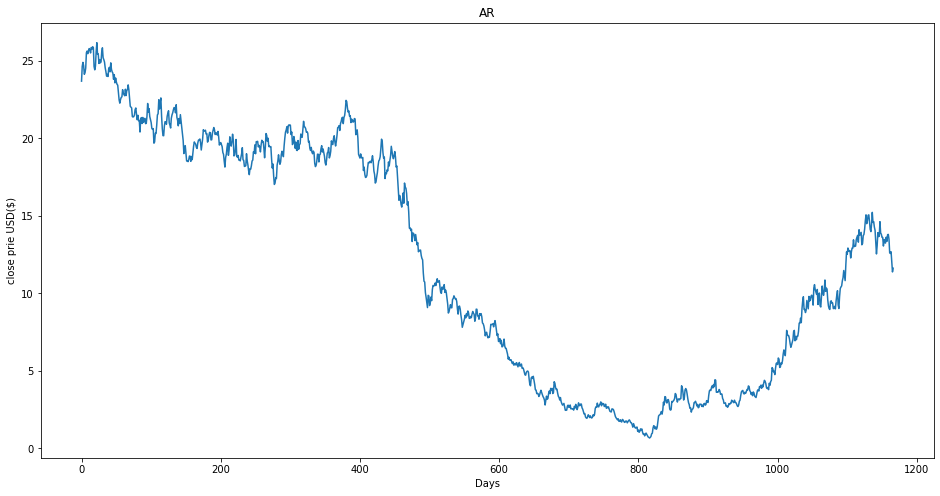

In [9]:
plt.figure(figsize =(16,8))
plt.title('AR')
plt.xlabel('Days')
plt.ylabel('close prie USD($)')
plt.plot(AR['Close'])
plt.show()

In [11]:
close_price = AR[['Close']]
close_price

,Close
0,23.680000
1,24.629999
2,24.889999
3,24.680000
4,24.120001
...,...
1162,12.570000
1163,12.680000
1164,11.990000
1165,11.380000


In [12]:
future_days = 30

close_price['prediction'] = close_price[['Close']].shift(-future_days)

In [13]:
X= np.array(close_price.drop(['prediction'],1))[:-future_days]

C:\Users\steve\AppData\Local\Temp/ipykernel_22344/1274731598.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X= np.array(close_price.drop(['prediction'],1))[:-future_days]


In [14]:
y= np.array(close_price['prediction'])[:-future_days]

In [15]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=25)

In [30]:
tree = sklearn.tree.DecisionTreeRegressor().fit(x_train, y_train)
print(tree)


DecisionTreeRegressor()


In [31]:
lr = sklearn.linear_model.LinearRegression().fit(x_train, y_train)
lr

LinearRegression()

In [18]:
x_future = close_price.drop(['prediction'], 1)[:-future_days]

C:\Users\steve\AppData\Local\Temp/ipykernel_22344/4106418182.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_future = close_price.drop(['prediction'], 1)[:-future_days]


In [19]:
x_future = x_future.tail(future_days)

In [20]:
x_future = np.array(x_future)
x_future

array([[12.92000008],
       [12.90999985],
       [13.44999981],
       [13.01000023],
       [13.06000042],
       [13.03999996],
       [13.47000027],
       [13.61999989],
       [13.73999977],
       [13.30000019],
       [14.10000038],
       [13.73999977],
       [13.84000015],
       [13.93000031],
       [13.13000011],
       [13.21000004],
       [13.72000027],
       [13.80000019],
       [14.14000034],
       [14.68000031],
       [15.06000042],
       [14.48999977],
       [14.68000031],
       [15.02999973],
       [15.06000042],
       [14.63000011],
       [14.13000011],
       [13.97999954],
       [14.47999954],
       [15.22000027]])

In [21]:
tree_prediction = tree.predict(x_future)

In [22]:
print(tree_prediction)

[14.81500006 14.61999989 14.27000046 14.06000042 13.23999977 12.53999996
 13.06999969 13.90999985 12.73666668 13.68000031 14.61999989 12.73666668
 13.81000042 13.60999966 12.15500021 13.05000019 13.47000027 13.27000046
 11.74499989 13.71000004 12.98000002 13.77999973 13.71000004 13.48999977
 12.98000002 12.56999969 11.74499989 11.98999977 11.38000011 11.61999989]


In [32]:
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[12.5422615  12.53290538 13.03812424 12.62646479 12.6732445  12.65453226
 13.05683648 13.1971747  13.30944546 12.89778601 13.64625863 13.30944546
 13.40300488 13.48720817 12.73873555 12.81358272 13.29073412 13.36558129
 13.68368222 14.18890108 14.5444256  14.01113838 14.18890108 14.51635724
 14.5444256  14.14212138 13.6743261  13.53398698 14.00178226 14.69411995]


In [24]:
predictions = tree_prediction 
valid = close_price[X.shape[0]:]

C:\Users\steve\AppData\Local\Temp/ipykernel_22344/4170329595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['prediction'] = predictions


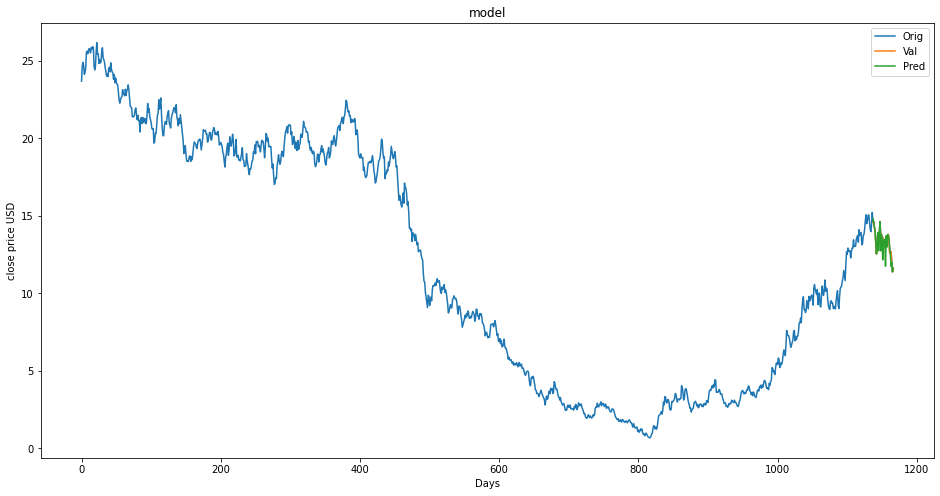

In [25]:
valid['prediction'] = predictions 
plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('Days')
plt.ylabel('close price USD')
plt.plot(close_price['Close'])
plt.plot(valid[['Close','prediction']])
plt.legend(['Orig','Val','Pred'])
plt.show()

C:\Users\steve\AppData\Local\Temp/ipykernel_22344/4052443177.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['prediction'] = predictions


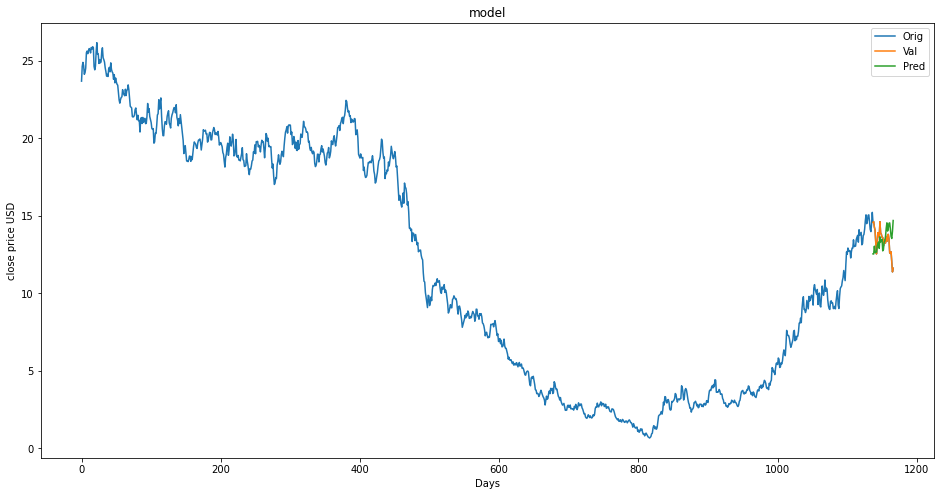

In [26]:
predictions = lr_prediction 
valid = close_price[X.shape[0]:]
valid['prediction'] = predictions 
plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('Days')
plt.ylabel('close price USD')
plt.plot(close_price['Close'])
plt.plot(valid[['Close','prediction']])
plt.legend(['Orig','Val','Pred'])
plt.show()

In [33]:
import yfinance as yf

In [34]:
tickers3 = ['AR']

In [44]:
ar = yf.Ticker("AR")
ar.info

{'zip': '80202',
 'sector': 'Energy',
 'fullTimeEmployees': 504,
 'longBusinessSummary': 'Antero Resources Corporation, an independent oil and natural gas company, acquires, explores for, develops, and produces natural gas, natural gas liquids, and oil properties in the United States. As of December 31, 2019, the company had approximately 451,000 net acres in the southwestern core of the Marcellus Shale; and 91,000 net acres in the core of the Utica Shale. It also owned and operated 324 miles of gas gathering pipelines in the Marcellus Shale; 17 compressor stations in the Marcellus Shale; 110 miles of low-pressure and high-pressure gathering pipelines in the Utica Shale; 8 miles of high-pressure pipelines; and 2 compressor stations in the Utica Shale. The company had estimated proved reserves of 18.9 trillion cubic feet of natural gas equivalent, including 11.5 trillion cubic feet of natural gas; 652 million barrels of assumed recovered ethane; 540 million barrels of primarily propane,

In [43]:
ar.info["longBusinessSummary"]

'Antero Resources Corporation, an independent oil and natural gas company, acquires, explores for, develops, and produces natural gas, natural gas liquids, and oil properties in the United States. As of December 31, 2019, the company had approximately 451,000 net acres in the southwestern core of the Marcellus Shale; and 91,000 net acres in the core of the Utica Shale. It also owned and operated 324 miles of gas gathering pipelines in the Marcellus Shale; 17 compressor stations in the Marcellus Shale; 110 miles of low-pressure and high-pressure gathering pipelines in the Utica Shale; 8 miles of high-pressure pipelines; and 2 compressor stations in the Utica Shale. The company had estimated proved reserves of 18.9 trillion cubic feet of natural gas equivalent, including 11.5 trillion cubic feet of natural gas; 652 million barrels of assumed recovered ethane; 540 million barrels of primarily propane, isobutane, normal butane, and natural gasoline; and 42 million barrels of oil. The compa

'Antero Resources Corporation, an independent oil and natural gas company, acquires, explores for, develops, and produces natural gas, natural gas liquids, and oil properties in the United States. As of December 31, 2019, the company had approximately 451,000 net acres in the southwestern core of the Marcellus Shale; and 91,000 net acres in the core of the Utica Shale. It also owned and operated 324 miles of gas gathering pipelines in the Marcellus Shale; 17 compressor stations in the Marcellus Shale; 110 miles of low-pressure and high-pressure gathering pipelines in the Utica Shale; 8 miles of high-pressure pipelines; and 2 compressor stations in the Utica Shale. The company had estimated proved reserves of 18.9 trillion cubic feet of natural gas equivalent, including 11.5 trillion cubic feet of natural gas; 652 million barrels of assumed recovered ethane; 540 million barrels of primarily propane, isobutane, normal butane, and natural gasoline; and 42 million barrels of oil. The company was formerly known as Antero Resources Appalachian Corporation and changed its name to Antero Resources Corporation in June 2013. Antero Resources Corporation was founded in 2002 and is headquartered in Denver, Colorado.'

In [45]:
ar.major_holders

,0,1
0,10.57%,% of Shares Held by All Insider
1,76.40%,% of Shares Held by Institutions
2,85.42%,% of Float Held by Institutions
3,336,Number of Institutions Holding Shares


In [47]:
ar.institutional_holders

,Holder,Shares,Date Reported,% Out,Value
0,"Vanguard Group, Inc. (The)",25013326,2021-06-29,0.0797,375950289
1,Blackrock Inc.,22218324,2021-06-29,0.0708,333941409
2,"FMR, LLC",16641527,2021-06-29,0.0530,250122150
3,State Street Corporation,13279355,2021-06-29,0.0423,199588705
4,Dimensional Fund Advisors LP,11405981,2021-06-29,0.0363,171431894
5,"Yorktown Energy Partners VIII, L.P.",9382570,2021-06-29,0.0299,141020027
6,SailingStone Capital Partners LLC,9289328,2021-06-29,0.0296,139618599
7,"Graham Capital Management, L.P.",7535078,2021-06-29,0.0240,113252222
8,"FPR Partners, LLC",6937559,2021-06-29,0.0221,104271511
9,"Goldman Sachs Group, Inc.",6590353,2021-06-29,0.0210,99053005


In [49]:
ar.sustainability

,Value
2021-9,
palmOil,False
controversialWeapons,False
gambling,False
socialScore,13.29
nuclear,False
furLeather,False
alcoholic,False
gmo,False
catholic,False


In [53]:
msft = yf.Ticker("MSFT")
msft.info["longBusinessSummary"]

'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. Its Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for organizations and enterprise divisions. Its Intelligent Cloud segment licenses SQL, Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also offers support services and Microsoft consulting services to assist customers in developing, deploying, and managing Microsoft server and desktop solutions; and training and certification on Microsoft products. Its More Personal Computing segment provides Windows original equipment m

In [54]:
msft.institutional_holders

,Holder,Shares,Date Reported,% Out,Value
0,"Vanguard Group, Inc. (The)",610974647,2021-06-29,0.0813,165513031872
1,Blackrock Inc.,505662500,2021-06-29,0.0673,136983971250
2,State Street Corporation,294824958,2021-06-29,0.0392,79868081122
3,"FMR, LLC",218007132,2021-06-29,0.0290,59058132058
4,Price (T.Rowe) Associates Inc,192408922,2021-06-29,0.0256,52123576969
5,"Geode Capital Management, LLC",123322145,2021-06-29,0.0164,33407969080
6,Capital World Investors,110830050,2021-06-29,0.0147,30023860545
7,Capital Research Global Investors,94576657,2021-06-29,0.0126,25620816381
8,Capital International Investors,92898047,2021-06-29,0.0124,25166080932
9,Northern Trust Corporation,88583941,2021-06-29,0.0118,23997389616
